In [175]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from skimage.io import imread
from skimage import measure
import skimage.util as util

In [177]:

test_image = util.img_as_float(imread(f"data//img_0.png"))[0:240,30:500]

In [220]:
def white_balance(image,patch):
    image_gt = ((image * (patch.mean() / image.mean(axis=(0, 1)))).clip(0, 1).astype(float))
    return image_gt

def reference_dot(patch):
    contour = measure.find_contours(patch[:,:,1])
    return contour

def bounding_box(contour):
    lx = int(np.floor(np.min(contour[:,1])))
    ly = int(np.floor(np.min(contour[:,1])))
    
    hx = int(np.ceil(np.max(contour[:,1])))
    hy = int(np.ceil(np.max(contour[:,1])))
    
    return lx,ly,hx,hy

def contour_mask(image,contour):
    
    x = np.arange(0,image.shape[0])
    y = np.arange(0,image.shape[1])
    xv, yv = np.meshgrid(x,y)
    
    points = list(zip(xv.ravel(),yv.ravel()))
    
    polygon = Path(contour)
    mask = polygon.contains_points(points)
    mask = mask.reshape((image.shape[0],image.shape[1]))
    
    return mask

def apply_mask(image, mask, x=1.0,y=0.0):
    image = np.copy(image)
    image[mask] = x
    mask = np.invert(mask)
    image[mask] = y
    return image

def reduce_by_mask(image,mask):
    image = np.copy(image)
    return image[mask]

C:\Users\linus\AppData\Local\Temp\ipykernel_7696\2954395867.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


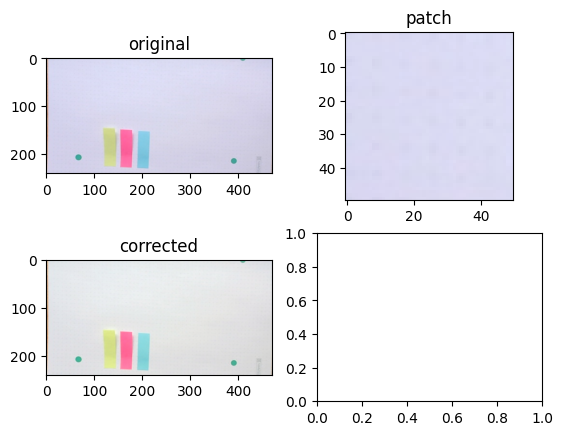

In [221]:
patch = test_image[50:100,50:100]
image_corrected = white_balance(test_image,patch)

fig, ax = plt.subplots(2,2)
ax[0,0].imshow(test_image)
ax[0,0].set_title("original")
ax[0,1].imshow(patch)
ax[0,1].set_title("patch")
ax[1,0].imshow(image_corrected)
ax[1,0].set_title("corrected")

fig.show()


[0.3155106851700885, 0.6877014153117085, 0.5954414733769611]


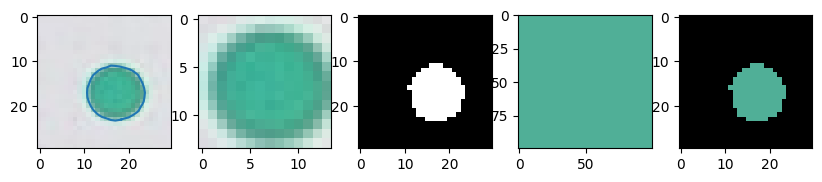

In [224]:
patch = image_corrected[190:220,50:80]
dot_contour = reference_dot(patch)[0]
only_dot = reduce_by_mask(patch,contour_mask(patch,dot_contour))

fig, ax = plt.subplots(1,5,figsize=(10,10))
ax[0].imshow(patch)
ax[0].plot(dot_contour[:,1],dot_contour[:,0])



mean_color_of_dot = [np.mean(only_dot[:,0]),np.mean(only_dot[:,1]),np.mean(only_dot[:,2])]

print(mean_color_of_dot)

lx,ly,hx,hy = bounding_box(dot_contour)
ax[1].imshow(patch[lx:hx,ly:hy])
ax[2].imshow(apply_mask(patch,contour_mask(patch,dot_contour)))



color = np.ones((100,100,3))
color[:,:] = mean_color_of_dot

ax[3].imshow(color)
ax[4].imshow(apply_mask(patch,contour_mask(patch,dot_contour),mean_color_of_dot,0))

In [207]:
x = np.arange(1,10)
y = np.arange(1,10)

xv,yv = np.meshgrid(x,y)
print(xv.ravel())

[1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1
 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1 2
 3 4 5 6 7 8 9]


In [208]:
list(np.ndindex(2,2))

[(0, 0), (0, 1), (1, 0), (1, 1)]